In [1]:
# Importing Library 
import numpy as np
import pandas as pd

# Loading Data Set
movies=pd.read_csv("D:\\Harshit Sethi\\Data Science CreTEch Internship\\Movie Recommendation System\\ml-latest-small\\ml-latest-small\\movies.csv")
ratings=pd.read_csv("D:\\Harshit Sethi\\Data Science CreTEch Internship\\Movie Recommendation System\\ml-latest-small\\ml-latest-small\\ratings.csv")

In [2]:
# Exploring Data Set
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [5]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [6]:
ratings.shape

(100836, 4)

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [11]:
# Check null values
print("Missing values in movies:\n", movies.isnull().sum())
print("Missing values in ratings:\n", ratings.isnull().sum())

# Check duplicates
print("Duplicate rows in movies:", movies.duplicated().sum())
print("Duplicate rows in ratings:", ratings.duplicated().sum())

Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Duplicate rows in movies: 0
Duplicate rows in ratings: 0


In [12]:
# checking data types
print(movies.dtypes)
print(ratings.dtypes)

movieId     int64
title      object
genres     object
dtype: object
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [13]:
# changing data type of time stamp
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [14]:
print(ratings['timestamp'].dtypes)

datetime64[ns]


In [15]:
import re

# Extract year from title using regex
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype('Int64')
movies['clean_title'] = movies['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

# Optional: split genres into lists
movies['genres'] = movies['genres'].apply(lambda x: x.split('|') if x != "(no genres listed)" else [])

In [16]:
# Merging Data Set
data=pd.merge(ratings,movies,on='movieId')

In [17]:
data.shape

(100836, 8)

In [18]:
data.head()

,userId,movieId,rating,timestamp,title,genres,year,clean_title
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Toy Story
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),"[Comedy, Romance]",1995,Grumpier Old Men
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),"[Action, Crime, Thriller]",1995,Heat
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995,Seven (a.k.a. Se7en)
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995,"Usual Suspects, The"


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   userId       100836 non-null  int64         
 1   movieId      100836 non-null  int64         
 2   rating       100836 non-null  float64       
 3   timestamp    100836 non-null  datetime64[ns]
 4   title        100836 non-null  object        
 5   genres       100836 non-null  object        
 6   year         100818 non-null  Int64         
 7   clean_title  100836 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.3+ MB


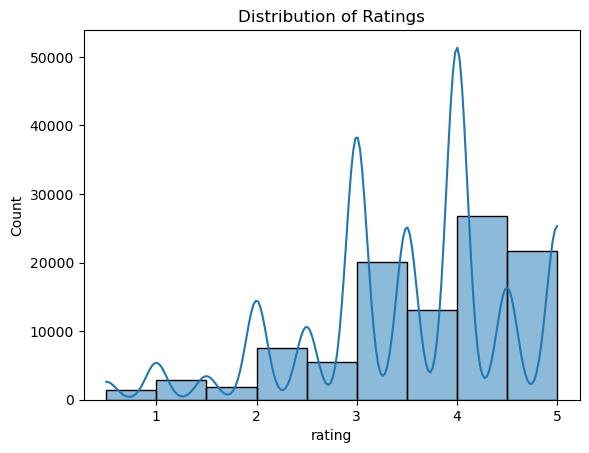

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


In [20]:
# EDA checks

# Rating distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['rating'],kde=True,bins=9)
plt.title("Distribution of Ratings")
plt.show()

# Top rated movies (by count)
top_rated = data['title'].value_counts().head(10)
print(top_rated)

In [21]:
# Create User-Movie Matrix (pivot table)
user_movie_matrix = data.pivot_table(index='userId', columns='title', values='rating')

# View a portion of the matrix
print(user_movie_matrix.head())

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             Na

In [22]:
# Collaborative Filtering using the Surprise Library
!pip install scikit-surprise
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Reader to define the rating scale
reader = Reader(rating_scale=(0.5, 5.0))

# Load ratings data into Surprise format
data_surprise = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

# Split into train/test
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

# Use User-based Collaborative Filtering
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Predict on testset
predictions = model.test(testset)

# Evaluate model performance
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9823


0.9822558142846856

In [23]:
# Generating Movie Recommendations for a User
from collections import defaultdict

# Function to get top-N recommendations
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort and keep top-N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# Get top-5 recommendations for each user
top_n = get_top_n(predictions, n=5)

# Example: Recommendations for userId = 1
user_1_recs = top_n[1]  # userId 1

# Map movieId back to movie title
for movie_id, predicted_rating in user_1_recs:
    title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"{title}: predicted rating {predicted_rating:.2f}")

Fight Club (1999): predicted rating 4.57
Goodfellas (1990): predicted rating 4.46
Star Wars: Episode IV - A New Hope (1977): predicted rating 4.42
Fargo (1996): predicted rating 4.34
Forrest Gump (1994): predicted rating 4.29
